<a href="https://colab.research.google.com/github/mohith-ds8/Airbnb-Data-Analysis-EDA/blob/main/EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - EDA on Airbnb Listings in NYC 



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name** - Mohith
##### **Cohort** - Enlighten

# **Project Summary -**

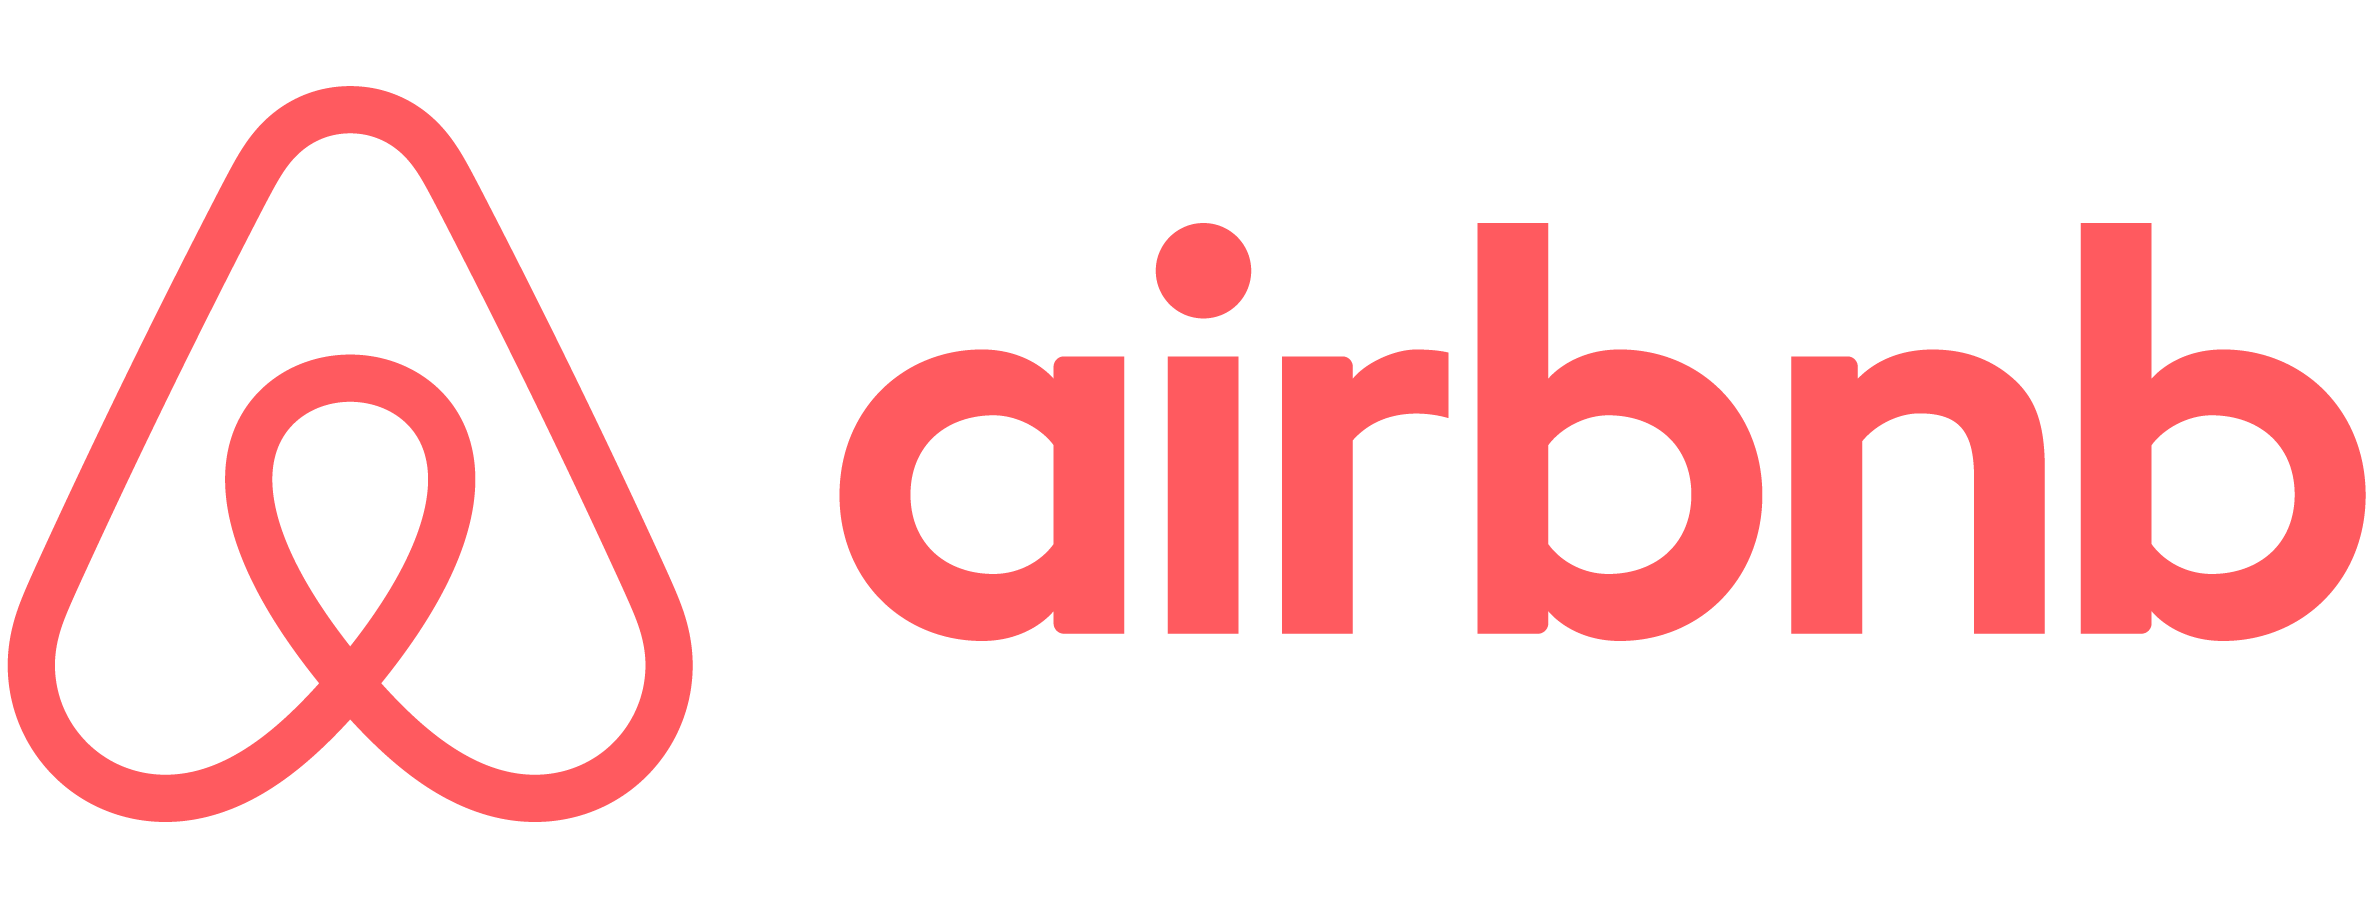


Airbnb is an online marketplace focused on short-term homestays and experiences. The company acts as a broker and charges a commission from each booking. It is based in San Francisco, California. <br> 
An Airbnb Dataset of 48895 entries and 16 variables was given to perform Exploratory Data Analysis (EDA)to find solutions for a particular business objective. <br>
The business objective was to provide the managment with insights that would help them break into hotel business in New York City under the brand name **Airbnb Stay**. <br>

The first step was to understand the data. Before that, the necessary libraries such as **Numpy, Pandas, Matplotlib & Seaborn** were imported. The data was loaded under the variable name *df* and first 5 rows were viewed to comprehend the data.
<br>
To understand each variable, all unique values were checked for each variable.

Upon inspection, it was found that some values were null. These null values in the Dataset were taken cared by replacing it with values best suited.
The columns also had ambigous values such as zero, which was taken cared by replacing those values by mean values of that particular subgroup and then the dataset was ready for EDA. 

Here are the list of EDAs performed on th dataset:
* A bar plot comparing the number of Airbnb units by neighbourhood group.
* A bar chart for neighbourhood group wise mean price and a box plot for all the price details.
* A bar polt showing top 10 neighbourhoods by unit count.
* A bar plot showing top 10 cheapest neighbourhoods by average price.
* A Countplot showing the count of room type by neighbourhood group.
* A bar plot showing top 10 hosts on Airbnb.
* A Scatter plot showing Airbnb unit availability vs their price.
* A Scatter plot to check how pricing affects number of reviews.

**After the EDA, we saw how each analysis contributed positively for the business objective to be achieved, and the same suggestions were made. They are:**

1. It is safer to stick with either of the top 2 neighbourhood group: Brooklyn / Manhattan.

2. As all the tourist attractions in NYC are present mostly in Manhattan & Brooklyn, guests prefer to stay close to this proximity, which in-turn allows hosts to charge higher prices.
Hence Airbnb should look at investing in any of these 2 neighbourhood groups.

3. It would be the best for Airbnb to locate their hotel in any one of the top 10 neighbourhoods within Brooklyn & Manhattan.

4. If Airbnb is thinking of starting off with a small investment, the provided 10 neighbourhoods would be best suited as they have low land price, and therefore will be able to charge customers in range of USD 50-60

5. If Airbnb has narrowed their choices to Brooklyn & Manhattan, it is best to invest in an entire home if they're going with Manhattan / invest in a single room if they're going with Brooklyn.

6. The top 10 people know the game better than anybody else, therefore Airbnb can get any one of them as a consultant at least for their first investment.

7. If Airbnb is targeting the luxury segment, they have to make sure to be available 365 days a year. These properties are empty most of the year & make their money back in short amount of time due to high pricing.

8. If Airbnb is planning in the luxury niche, they have to be on point as there's not much reviews and they've got to make sure every review they get is positive.

Outside of these results, I also mentioned that Airbnb as a platfrom had people's trust which it had earned all these years & they would have no problem with initial business.

But, as this property would be exclusively from Airbnb, the expectation would be at a much higher level compared to the elegance of the platform. And hence, the future of the hotel unit depends upon the reviews of the initial guests. Airbnb should go out of their way to serve these initial guests to get a good ratinh on their property which build momentum and drives business.

# **GitHub Link -** 

https://github.com/mohith-ds8/Airbnb-Data-Analysis-EDA

# **Problem Statement** 


1. **How many Airbnb units are there in each neighbourhood group?**
2. **How much does a unit cost in each neighbourhood group by average?**
3. **What are the top 10 neighbourhoods by unit count?**
4. **What are the top 10 cheapest neighbourhoods?**
5. **Which room type dominates in each neighbourhood?**
6. **Who are the top 10 hosts in NYC?**
7. **How does price affect the availability of the unit 365 days a year?**
8. **How does price affect the number of reviews?**
9. **What is the minimum number of nights hosts prefer the most?**



#### **Define Your Business Objective?**

## Till date, Airbnb does not own a single piece of real estate, yet they cloaked in a revenue of $6 Billion in 2021. Now, they want to enter the hotel business starting with their first hotel New York City under the brand name, **'Airbnb Stay'**.

## Therefore, we are to do a detailed Exploratory Data Analysis on existing Airbnb units to provide the management with options which is both economical and profitable at the same time.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data*** done

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('/content/Airbnb NYC 2019.csv')

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(48895, 16)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
# Visualizing the missing values
df[df['host_name'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,2017-01-02,0.69,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,2019-05-23,1.00,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2019-06-19,3.59,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2019-06-19,3.18,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,NaN,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0


In [9]:
# Visualizing the missing values
df[df['last_review'].isna()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


### What did you know about your dataset?

The Dataset contains details of all the airbnb units in New York City. 
<br> It has a total of 48895 entries with various types information about the unit distributed over 16 columns. The Dataset size is 6 MB and variables are stored in 3 main datatypes:
* int64 - 7
* float64 - 3
* object - 6

## ***2. Understanding Your Variables*** done

In [10]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

The 16 variables in the Dataset are:


1. **ID** - Identification number given for the Airbnb unit.
2. **name** - Name of the Airbnb unit.
3. **host_id** - Unique identification number given to the host of the Airbnb unit.
4. **host_name** - Name of the host.
4. **neighbourhood_group** - Neighbourhood group to which the unit belongs to.
5. **neighbourhood** - Neighbourhood to which the unit belongs to.
6. **latitude** - Latitude of the unit.
7. **longitude** - Longitude of the unit.
8. **room_type** - Type of room.
9. **price** - Price charged per night.
10. **minimum_nights** - Minimum number of nights required to stay.
11. **number_of_reviews** - Number of reviews recieved by the unit.
12. **last_review** - Date of the last review.
13. **reviews_per_month** - Ratio of reviews recieved by the unit per month.
14. **calculated_host_listings_count** - Total number of listings by the host.
15. **availability_365** - Availability of the unit in a year in days.



### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.

In [13]:
df['id'].unique()

array([    2539,     2595,     3647, ..., 36485431, 36485609, 36487245])

In [14]:
df['name'].unique()

array(['Clean & quiet apt home by the park', 'Skylit Midtown Castle',
       'THE VILLAGE OF HARLEM....NEW YORK !', ...,
       'Sunny Studio at Historical Neighborhood',
       '43rd St. Time Square-cozy single bed',
       "Trendy duplex in the very heart of Hell's Kitchen"], dtype=object)

In [15]:
df['host_id'].unique()

array([     2787,      2845,      4632, ..., 274321313,  23492952,
        68119814])

In [16]:
df['host_name'].unique()

array(['John', 'Jennifer', 'Elisabeth', ..., 'Abayomi', 'Alberth',
       'Ilgar & Aysel'], dtype=object)

In [17]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [18]:
df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [19]:
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [20]:
df['price'].unique()

array([  149,   225,   150,    89,    80,   200,    60,    79,   135,
          85,   120,   140,   215,    99,   190,   299,   130,   110,
          44,   180,    50,    52,    55,    70,    35,    40,    68,
         115,   151,   228,   144,    69,    49,   375,   250,   275,
         230,    51,    65,   105,    95,   145,   285,    94,   800,
         131,    98,   100,   125,   175,   500,   101,   220,    59,
         350,   199,   325,   235,   170,   400,    75,    90,   185,
          77,    76,   160,   195,   156,   219,   475,   165,   196,
          83,   123,   265,   249,   121,    45,    71,    64,   159,
         189,   239,   305,   155,    92,    36,    37,   205,    39,
         390,   129,   212,   124,   122,   109,   575,   229,   169,
         113,   179,   349,   139,   650,    67,   599,   211,   290,
          87,   395,   260,    97,   132,   141,   495,   259,    96,
         295,   451,   300,    42,   255,    72,    88,   450,   198,
          46,    33,

In [21]:
df['minimum_nights'].unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36])

In [22]:
df['number_of_reviews'].unique()

array([  9,  45,   0, 270,  74,  49, 430, 118, 160,  53, 188, 167, 113,
        27, 148, 198, 260, 130,  39,  71,  88,  19,  58, 108,  29, 242,
       197, 273, 168, 231, 214, 245,  15,  25,  81,  97,  11, 248,  61,
       135, 112,  73,  82, 328, 105, 289, 138,  21,  42,   5,  66, 143,
       191,   4, 338, 106, 190,  23, 142,  54,  70,  16,  94, 194,   2,
       174,  24, 166,   1,  30, 139, 233,  68,  46, 335, 162, 170, 334,
        12, 467,   7,  38, 324, 115, 354, 195,  13,  36,  63, 155, 193,
        32,  50,  26, 426, 227,  84,   3,  10, 124, 240, 200,  79,  34,
       134, 126, 234, 202,  28, 309,  14,  80, 294, 150,  47, 219, 114,
       213,  86,  18, 206, 122,  33,  52,  51, 199,  41, 109, 151, 285,
       375,   6, 358, 226, 104, 204, 253, 129,  37,  69, 192,  17, 222,
       205, 458, 183, 189, 127,  35, 171,  92, 238,  56, 111, 147, 177,
       185,  62, 181, 333, 441, 279, 203, 210,  64, 132,  20,  67, 187,
        22,  93,  48, 120,  43,  59,  31, 220, 286, 398,  76, 18

In [23]:
df['reviews_per_month'].unique()

array([2.100e-01, 3.800e-01,       nan, 4.640e+00, 1.000e-01, 5.900e-01,
       4.000e-01, 3.470e+00, 9.900e-01, 1.330e+00, 4.300e-01, 1.500e+00,
       1.340e+00, 9.100e-01, 2.200e-01, 1.200e+00, 1.720e+00, 2.120e+00,
       4.440e+00, 7.000e-02, 1.090e+00, 3.700e-01, 6.100e-01, 7.300e-01,
       1.370e+00, 4.900e-01, 1.110e+00, 2.400e-01, 2.040e+00, 1.420e+00,
       1.650e+00, 2.370e+00, 6.600e-01, 1.410e+00, 1.960e+00, 1.810e+00,
       2.080e+00, 3.900e-01, 2.300e-01, 6.900e-01, 8.400e-01, 2.250e+00,
       5.200e-01, 1.160e+00, 1.010e+00, 6.300e-01, 7.000e-01, 2.820e+00,
       9.000e-01, 1.700e-01, 2.490e+00, 1.190e+00, 3.000e-01, 1.200e-01,
       5.700e-01, 1.600e-01, 4.720e+00, 1.400e+00, 1.260e+00, 1.640e+00,
       1.600e+00, 9.200e-01, 2.000e-01, 1.280e+00, 5.400e-01, 6.200e-01,
       1.500e-01, 5.300e-01, 1.730e+00, 5.000e-02, 1.540e+00, 2.800e-01,
       3.400e+00, 1.570e+00, 1.050e+00, 7.100e-01, 1.100e-01, 2.700e-01,
       1.230e+00, 8.700e-01, 2.090e+00, 6.000e-01, 

In [24]:
df['calculated_host_listings_count'].unique()

array([  6,   2,   1,   4,   3,   5,   7,  13,  28,  11,   8,   9,  52,
        18,  15,  19,  10,  39,  26,  29,  12,  21,  96,  14,  34,  43,
       121,  37,  49,  31,  91,  16,  87,  33,  23,  50,  20,  25, 232,
        17,  47, 103,  65,  30,  27, 327,  32])

In [25]:
df['availability_365'].unique()

array([365, 355, 194,   0, 129, 220, 188,   6,  39, 314, 333,  46, 321,
        12,  21, 249, 347, 364, 304, 233,  85,  75, 311,  67, 255, 284,
       359, 269, 340,  22,  96, 345, 273, 309,  95, 215, 265, 192, 251,
       302, 140, 234, 257,  30, 301, 294, 320, 154, 263, 180, 231, 297,
       292, 191,  72, 362, 336, 116,  88, 224, 322, 324, 132, 295, 238,
       209, 328,  38,   7, 272,  26, 288, 317, 207, 185, 158,   9, 198,
       219, 342, 312, 243, 152, 137, 222, 346, 208, 279, 250, 164, 298,
       260, 107, 199, 299,  20, 318, 216, 245, 189, 307, 310, 213, 278,
        16, 178, 275, 163,  34, 280,   1, 170, 214, 248, 262, 339,  10,
       290, 230,  53, 126,   3,  37, 353, 177, 246, 225,  18, 343, 326,
       162, 240, 363, 247, 323, 125,  91, 286,  60,  58, 351, 201, 232,
       258, 341, 244, 329, 253, 348,   2,  56,  68, 360,  76,  15, 226,
       349,  11, 316, 281, 287,  14,  86, 261, 331,  51, 254, 103,  42,
       325,  35, 203,   5, 276, 102,  71,  78,   8, 182,  79,  4

## 3. ***Data Wrangling*** done

### Data Wrangling Code

In [26]:
# Write your code to make your dataset analysis ready.

### Replace all null values in *name* & *host_name* by room_type
Instead of deleting 'name' and 'host_name' column, we can at least replace the null values by their room type

In [27]:
# replace null names by room_type
df['name'].fillna(df['room_type'],inplace=True)

In [28]:
# replace host names by room_type
df['host_name'].fillna(df['room_type'],inplace=True)

In [29]:
# checking null values
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Droping *last_review* & replacing null values in *reviews_per_month* by zero
We can drop 'last_review' column and we can replace null values in 'reviews_per_month' by 0

In [30]:
# dropping 'last review' column
df.drop(['last_review'],axis=1,inplace=True)

In [31]:
# replacing null values in 'reviews per month' by 0
df['reviews_per_month'].fillna(0,inplace=True)

In [32]:
# checking null values
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Therefore all null values are taken cared.

### Replacing price=0 by avg price of neighbour_grp 
We can observe that minimum price is 0 which can't b right, hence we are replacing those values by **average** price based on their 'neighbourhood_type'.

In [33]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [34]:
# get all rows eith price=0
df[df['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333


In [35]:
# Creating a new dataframe 'avg_price_neighbourhood' which contains groupby by neighbourhood group and their mean prices.
avg_price_neighbourhood = pd.DataFrame(df.groupby(['neighbourhood_group'])['price'].mean())

In [36]:
avg_price_neighbourhood

,price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


In [37]:
# Replacing all the prices=0 by average price depending on the neighbourhood group from the above dataframe.

df['price'][(df['neighbourhood_group'] == 'Bronx') & (df['price'] == 0)] = 87.496792
df['price'][(df['neighbourhood_group'] == 'Brooklyn') & (df['price'] == 0)] = 124.383207
df['price'][(df['neighbourhood_group'] == 'Manhattan') & (df['price'] == 0)] = 196.875814

<ipython-input-37-0fc8f6a4c7da>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][(df['neighbourhood_group'] == 'Bronx') & (df['price'] == 0)] = 87.496792
<ipython-input-37-0fc8f6a4c7da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][(df['neighbourhood_group'] == 'Brooklyn') & (df['price'] == 0)] = 124.383207
<ipython-input-37-0fc8f6a4c7da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'][(df['neigh

In [38]:
# checking again
df[df['price'] == 0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365


In [39]:
# Changing values of 'minimum_nights' to 365 which are greater than 365
df['minimum_nights']=df['minimum_nights'].apply(lambda x: 365 if x>365 else x)

In [40]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.749398,6.942980,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.143815,17.530294,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,365.000000,629.000000,58.500000,327.000000,365.000000


### What all manipulations have you done and insights you found?

* Average price of an airbnb unit in NYC is **$152**.
* Average minimum nigths set by the host is **7 days**.
* Each unit gets at least **1 review** per month on an average.
* The highest listing in NYC a single host has is **327**.
* The most expensive Airbnb unit costs **10000 USD**.
* min=0 for days 'availability_365' represents biz is closed / discontinued.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables*** done

In [41]:
# Setting the display size of chart to 10*6 pixels.
sns.set(rc={'figure.figsize':(10,6)})

#### Chart - 1
A bar plot comparing the number of Airbnb units by neighbourhood group.

In [42]:
# Chart - 1 visualization code
# Creating a new dataframe neighbourhood_group_count to store number of airbnb units corresponding to the neighbourhood group.

neighbourhood_group_count = pd.DataFrame(df.groupby(['neighbourhood_group'])['id'].count())
neighbourhood_group_count.reset_index(inplace=True)
neighbourhood_group_count.rename(columns={'id':'count'},inplace=True)
neighbourhood_group_count

,neighbourhood_group,count
0,Bronx,1091
1,Brooklyn,20104
2,Manhattan,21661
3,Queens,5666
4,Staten Island,373


Text(0, 0.5, 'No. of Airbnb units')

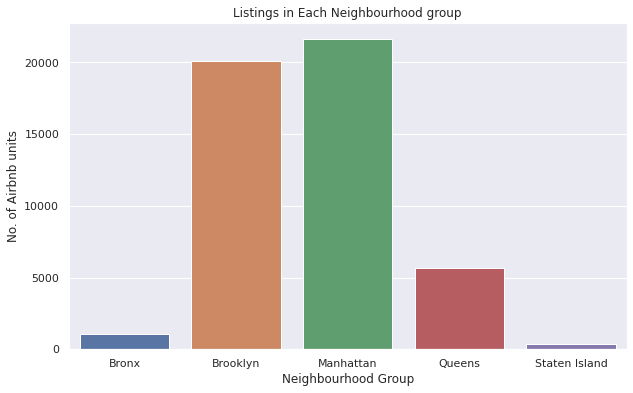

In [43]:
# Plotting the chart using Seaborn
neighbourhood_count = sns.barplot(x=neighbourhood_group_count['neighbourhood_group'],y=neighbourhood_group_count['count'])

neighbourhood_count.set_title('Listings in Each Neighbourhood group')
neighbourhood_count.set_xlabel('Neighbourhood Group')
neighbourhood_count.set_ylabel('No. of Airbnb units')

##### 1. Why did you pick the specific chart?

As the values in both x & y axes are not in series / continuous, the bar chart is the best option as details are displayed explicitly.



##### 2. What is/are the insight(s) found from the chart?

Out of the 5 neighbourhood groups, **Brooklyn & Manhattan** have way more units, at least 300% more units than the other 3 neighbourhood groups.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights helps creating a positive business impact.

As this is the first experiment from Airbnb, it is safer to stick with either of the top 2 neighbourhood group: **Brooklyn / Manhattan**.

#### Chart - 2
A bar chart for neighbourhood group wise mean price and a box plot for all the price details.

In [44]:
# Chart - 2 visualization code
# Creating a new dataframe neighbourhood_price_count to store the mean price corresponding to the neighbourhood group.

neighbourhood_price_count = pd.DataFrame(df.groupby(['neighbourhood_group'])['price'].mean())
neighbourhood_price_count.reset_index(inplace=True)
neighbourhood_price_count.rename(columns={'price':'mean price'},inplace=True)
neighbourhood_price_count

,neighbourhood_group,mean price
0,Bronx,87.576991
1,Brooklyn,124.438890
2,Manhattan,196.884903
3,Queens,99.517649
4,Staten Island,114.812332


Text(0, 0.5, 'Mean price')

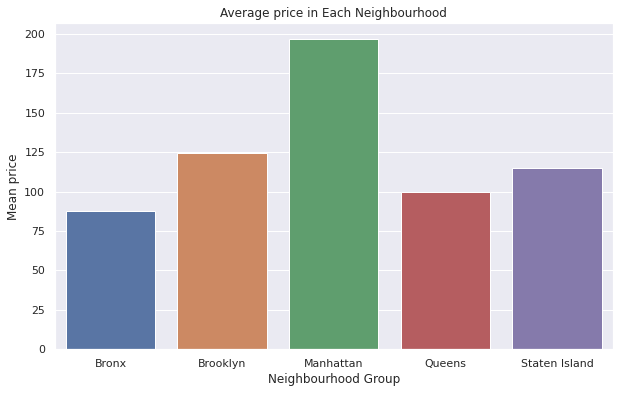

In [45]:
# Plotting the chart using Seaborn
neighbourhood_price = sns.barplot(x=neighbourhood_price_count['neighbourhood_group'],y=neighbourhood_price_count['mean price'])

neighbourhood_price.set_title('Average price in Each Neighbourhood')
neighbourhood_price.set_xlabel('Neighbourhood Group')
neighbourhood_price.set_ylabel('Mean price')

Text(0, 0.5, 'Price')

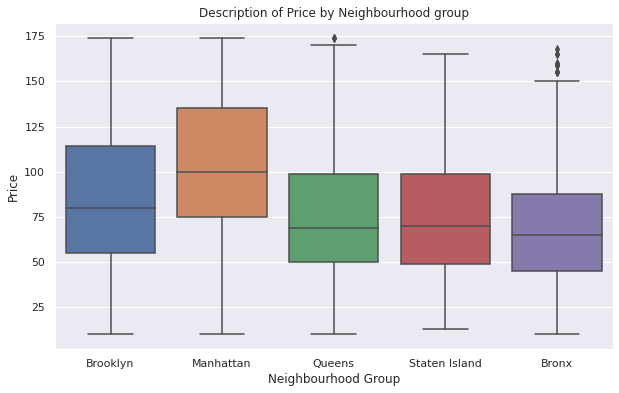

In [46]:
# Creating a new dataframe df_price_175 to store the dataframe values where 'price' is less than $175.
df_price_175 = df[df['price']<175]

# As 75% of column 'price' is less than $175, we have considered only that dataframe to get a more comprehensive boxplot. 

# Plotting a boxplot using Seaborn

boxplot = sns.boxplot(y= 'price',x= 'neighbourhood_group',data=df_price_175)
boxplot.set_title('Description of Price by Neighbourhood group')
boxplot.set_xlabel('Neighbourhood Group')
boxplot.set_ylabel('Price')

##### 1. Why did you pick the specific chart?

The Box plot chart helps in getting an all-round view of price distribution across neighbourhood groups.

##### 2. What is/are the insight(s) found from the chart?

The range is constant for all neighbourhood groups suggesting that, all neighbourhood groups cater to different types of guests according to their budget.
Manhattan has the highest average price followed by Brooklyn. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights helps creating a positive business impact.

As all the tourist attractions in NYC are present mostly in Manhattan & Brooklyn, guests prefer to stay close to this proximity, which in-turn allows hosts to charge higher prices.<br>
Hence Airbnb should look at investing in any of these 2 neighbourhood groups.

#### Chart - 3
A bar polt showing top 10 neighbourhoods by unit count.

In [47]:
# Chart - 3 visualization code
# Creating a new dataframe top_neigbourhood to store number of airbnb units corresponding to the neighbourhood.

top_neigbourhood = df.groupby(['neighbourhood'])['neighbourhood'].count()
top_neigbourhood.sort_values(ascending=False,inplace=True)

# Creating a new dataframe top_10_neighbourhood to store the top 10 neighbourhood by airbnb unit count.
top_10_neighbourhood = top_neigbourhood.head(10)
top_10_neighbourhood

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

Text(0, 0.5, 'No. of Airbnb units')

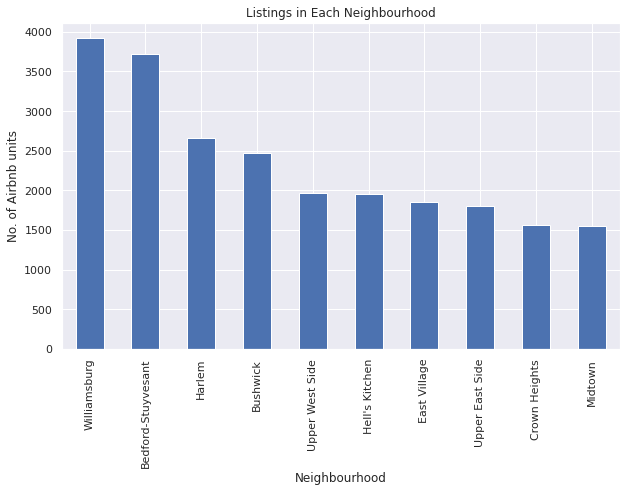

In [48]:
# Plotting the chart using Matplotlib
top_10_neighbourhood.plot(kind='bar')

plt.title('Listings in Each Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('No. of Airbnb units')

##### 1. Why did you pick the specific chart?

As the values in both x & y axes are not in series / continuous, the bar chart is the best option as details are displayed explicitly.

##### 2. What is/are the insight(s) found from the chart?

Williamsburg neighbouhood in Brooklyn has the highest number of Airbnb units. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

As these neighbourhoods are tried and tested over time, it would be the best for Airbnb to locate their hotel in any one of these top 10 neighbourhoods.

#### Chart - 4
A bar plot showing top 10 cheapest neighbourhoods by average price.

In [49]:
# Chart - 4 visualization code
# Creating a new dataframe price_neigbourhood to store the mean price corresponding to the neighbourhood.

price_neigbourhood = df[(df['neighbourhood_group'] == 'Brooklyn') | (df['neighbourhood_group'] == 'Manhattan') ]
price_neigbourhood = df.groupby(['neighbourhood'])['price'].mean()
price_neigbourhood.sort_values(ascending=False,inplace=True)

# Creating a new dataframe top_10_neighbourhood to store the top 10 cheapest neighbourhood.
price_10_neigbourhood = pd.DataFrame(price_neigbourhood.tail(10))
price_10_neigbourhood.reset_index(inplace=True)
price_10_neigbourhood

,neighbourhood,price
0,Mount Eden,58.500000
1,Concord,58.192308
2,Grant City,57.666667
3,New Dorp Beach,57.400000
4,Bronxdale,57.105263
5,New Dorp,57.000000
6,Soundview,53.466667
7,Tremont,51.545455
8,Hunts Point,50.500000
9,Bull's Head,47.333333


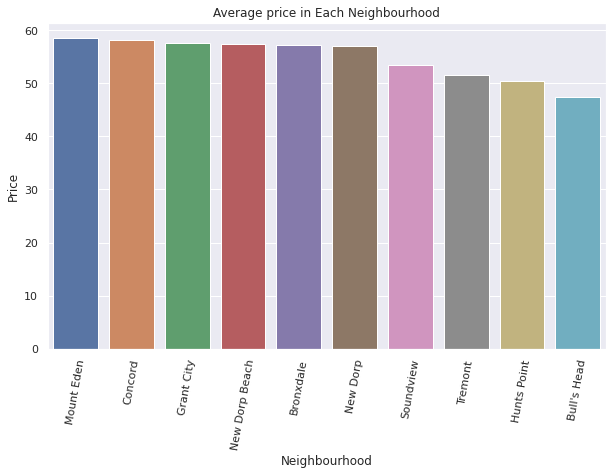

In [50]:
# Plotting the chart using Seaborn
price_10_neigbourhood_chart = sns.barplot(data=price_10_neigbourhood,x='neighbourhood',y='price')

price_10_neigbourhood_chart.set_title('Average price in Each Neighbourhood')
price_10_neigbourhood_chart.set_xlabel('Neighbourhood')
price_10_neigbourhood_chart.set_ylabel('Price')

# Rotate x-axis labels by 80 degrees
price_10_neigbourhood_chart.set_xticklabels(price_10_neigbourhood_chart.get_xticklabels(), rotation=80);

##### 1. Why did you pick the specific chart?

As the values in both x & y axes are not in series / continuous, the bar chart is the best option as details are displayed explicitly.

##### 2. What is/are the insight(s) found from the chart?

The cheapest units have an average price ranging from USD 50-60.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If Airbnb is thinking of starting off with a small investment, the provided 10 neighbourhoods would be best suited as they have low land price, and therefore will be able to charge customers in range of USD 50-60.

#### Chart - 5
A Countplot showing the count of room type by neighbourhood group.

Text(0, 0.5, 'Count')

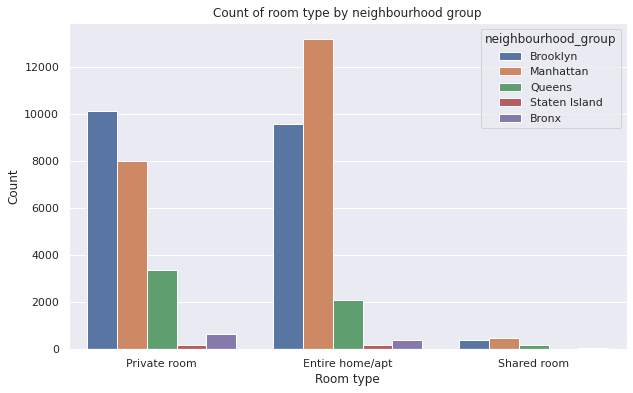

In [51]:
# Chart - 5 visualization code
# Plotting the chart using Seaborn
room_type_count = sns.countplot(x=df['room_type'],hue=df['neighbourhood_group'])

room_type_count.set_title('Count of room type by neighbourhood group')
room_type_count.set_xlabel('Room type')
room_type_count.set_ylabel('Count')

##### 1. Why did you pick the specific chart?

The Seaborn countplot is equipped to display the above chart with a single line of code. Hence for all count related plots, Seaborn countplot is preferred.

##### 2. What is/are the insight(s) found from the chart?

There are more private rooms in Brooklyn whereas in Manhattan, more entire homes are let out. As Manhattan has more number of skyscrapers and apartments, we can see more homes being let out. In Brooklyn, there's more land area comparitively, hence we can see more single room, room type being let out. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If Airbnb has narrowed their choices to Brooklyn & Manhattan, it is best preferred to invest in an entire home if they're going with Manhattan / invest in a single room if they're going with Brooklyn.

#### Chart - 6
A bar plot showing top 10 hosts on Airbnb.

In [52]:
# Chart - 6 visualization code
# Creating a new dataframe top_10_hosts to store the top 10 hosts by airbnb unit count.

top_10_hosts = pd.DataFrame(df['host_id'].value_counts().head(10))
top_10_hosts

,host_id
219517861,327
107434423,232
30283594,121
137358866,103
16098958,96
12243051,96
61391963,91
22541573,87
200380610,65
7503643,52


Text(0, 0.5, 'No. of Airbnb units')

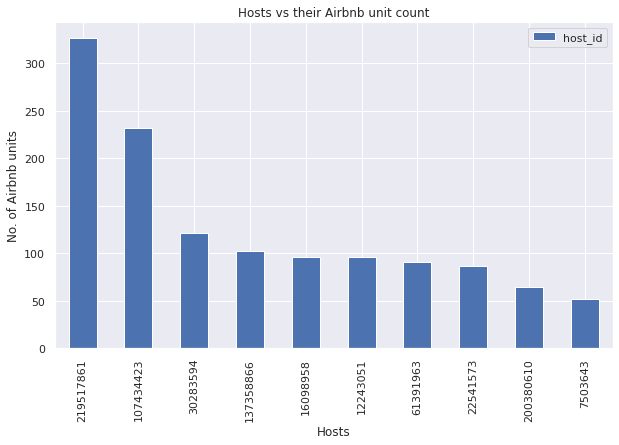

In [53]:
# Plotting the chart using Matplotlib
top_10_hosts.plot(kind='bar')

plt.title('Hosts vs their Airbnb unit count')
plt.xlabel('Hosts')
plt.ylabel('No. of Airbnb units')

##### 1. Why did you pick the specific chart?

As the values in both x & y axes are not in series / continuous, the bar chart is the best option as details are displayed explicitly.

##### 2. What is/are the insight(s) found from the chart?

The hosts are making big money with their spare homes/rooms, with Airbnb being #1 choice rather than renting out. The top host has a total of 327 properties making passive income for him/her in NYC.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These top 10 people know the game better than anybody else, therefore Airbnb can get any one of them as a consultant for their first investment.

#### Chart - 7
A Scatter plot showing Airbnb unit availability vs their price.

Text(0, 0.5, 'Price')

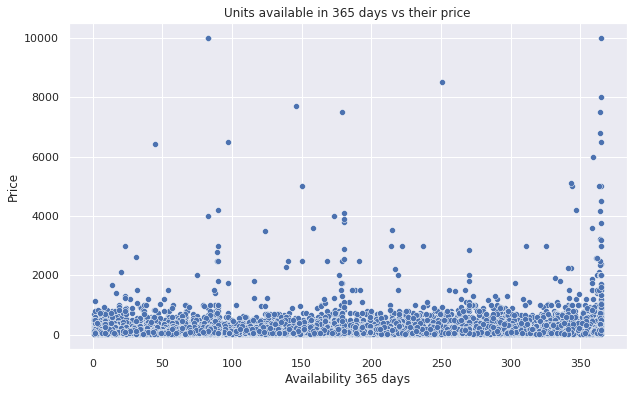

In [54]:
# Chart - 7 visualization code
# Creating a dataframe availability_price_df which contains only availability_365 & price from original dataframe.
availability_price_df = df[['availability_365','price']]
availability_price_df = availability_price_df[availability_price_df['availability_365'] !=0]

# Plotting the chart using Seaborn
scatter_plot = sns.scatterplot(data=availability_price_df,x='availability_365',y='price')

scatter_plot.set_title('Units available in 365 days vs their price')
scatter_plot.set_xlabel('Availability 365 days')
scatter_plot.set_ylabel('Price')

##### 1. Why did you pick the specific chart?

A Seaborn scatter plot enables us to visualize each entry in the dataframe, thereby giving us a complete picture, taking all entries into consideration.

##### 2. What is/are the insight(s) found from the chart?

The luxury segment i.e price > $4000 a night rooms are avialable throughout the year.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If Airbnb is targeting the luxury segment, they have to make sure to be available 365 days a year. These properties are empty most of the year & make their money back in short amount of time due to high pricing. <br>
As this *short booked time* solely depends on the guest and their booking date requirements, it's vital for them to stay open 365 days.

#### Chart - 8
A Scatter plot to check how pricing affects number of reviews.

Text(0, 0.5, 'No. of Reviews')

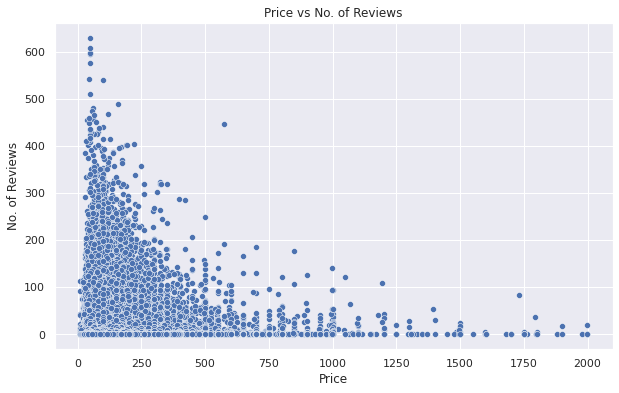

In [55]:
# Chart - 8 visualization code
# Creating a dataframe reviews_price_df which contains only number_of_reviews & price from original dataframe.
reviews_price_df = df[['number_of_reviews','price']]

# Consider only those of price less than $2000 for more comprehensive plot.
reviews_price_df = reviews_price_df[reviews_price_df['price']<2000]

# Plotting the chart using Seaborn
scatter_plot2 = sns.scatterplot(data=reviews_price_df,y='number_of_reviews',x='price')

scatter_plot2.set_title('Price vs No. of Reviews')
scatter_plot2.set_xlabel('Price')
scatter_plot2.set_ylabel('No. of Reviews')

##### 1. Why did you pick the specific chart?

A Seaborn scatter plot enables us to visualize each entry in the dataframe, thereby giving us a complete picture, taking all entries into consideration.

##### 2. What is/are the insight(s) found from the chart?

As the price increases, the number of reviews reduces. But also, most individuals would not be able to afford the higher price.<br>
And there can be 2 resasons when a property has got more number of reviews than average. It must be so good that people want to recommend to others, or their experience was so bad, they want people to not pick this unit.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, if Airbnb is planning in the luxury niche, they have to be on point as there's not much reviews and they've got to make sure every review they get is positive.

#### Chart - 9
A Barplot checking the density of Minimum nights.

Text(0.5, 0, 'Minimum Nights')

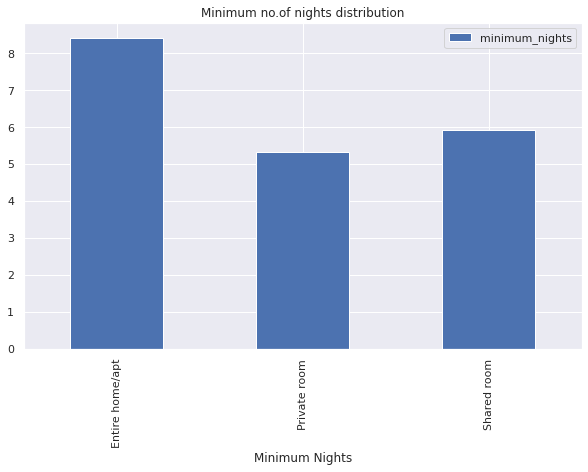

In [56]:
# Chart - 9 visualization code
# Plotting the chart using Seaborn
minrt = pd.DataFrame(df[['minimum_nights','room_type']].groupby('room_type')['minimum_nights'].mean())

minrt.plot(kind='bar')
plt.title('Minimum no.of nights distribution')
plt.xlabel('Minimum Nights')

##### 1. Why did you pick the specific chart?

As the values in both x & y axes are not in series / continuous, the bar chart is the best option as details are displayed explicitly.

##### 2. What is/are the insight(s) found from the chart?

The minimum number of nights set by the host for "Entire home/apt" is 8 days on average. The average minimum number of nights for 'Private rooms' and 'Shared room' is ~ 5 days on average.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To give the customer full flexibility, it is better to set the minimum number of nights to 1. <br>
If the home/room is theme based, For ex: Christmas getaway, the minimum number of nights can be set to 7 days.

#### Chart - 10 - Correlation Heatmap

In [57]:
# Correlation Heatmap visualization code
# Creating a new dataframe corr_df to store correlation data of df.
corr_df = df.corr()
corr_df

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010636,-0.012691,-0.319760,0.180221,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015290,-0.019974,-0.140106,0.209783,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033901,0.028118,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.149966,-0.070785,0.059094,0.138516,-0.114713,0.082731
price,0.010636,0.015290,0.033901,-0.149966,1.000000,0.049926,-0.047933,-0.050538,0.057463,0.081834
minimum_nights,-0.012691,-0.019974,0.028118,-0.070785,0.049926,1.000000,-0.091764,-0.143399,0.150526,0.162278
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047933,-0.091764,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.180221,0.209783,-0.018758,0.138516,-0.050538,-0.143399,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057463,0.150526,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081834,0.162278,0.172028,0.163732,0.225701,1.000000


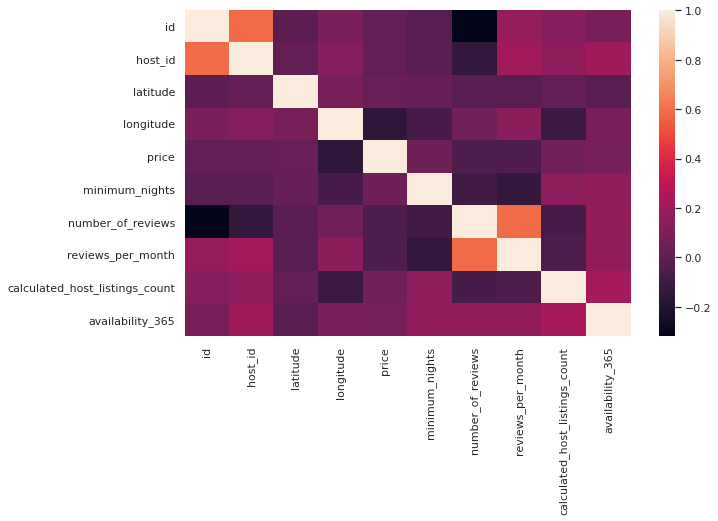

In [58]:
# Plotting the Heatmap using Seaborn
sns.heatmap(corr_df)

##### 1. Why did you pick the specific chart?

Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

#### Chart - 11 - Pair Plot 

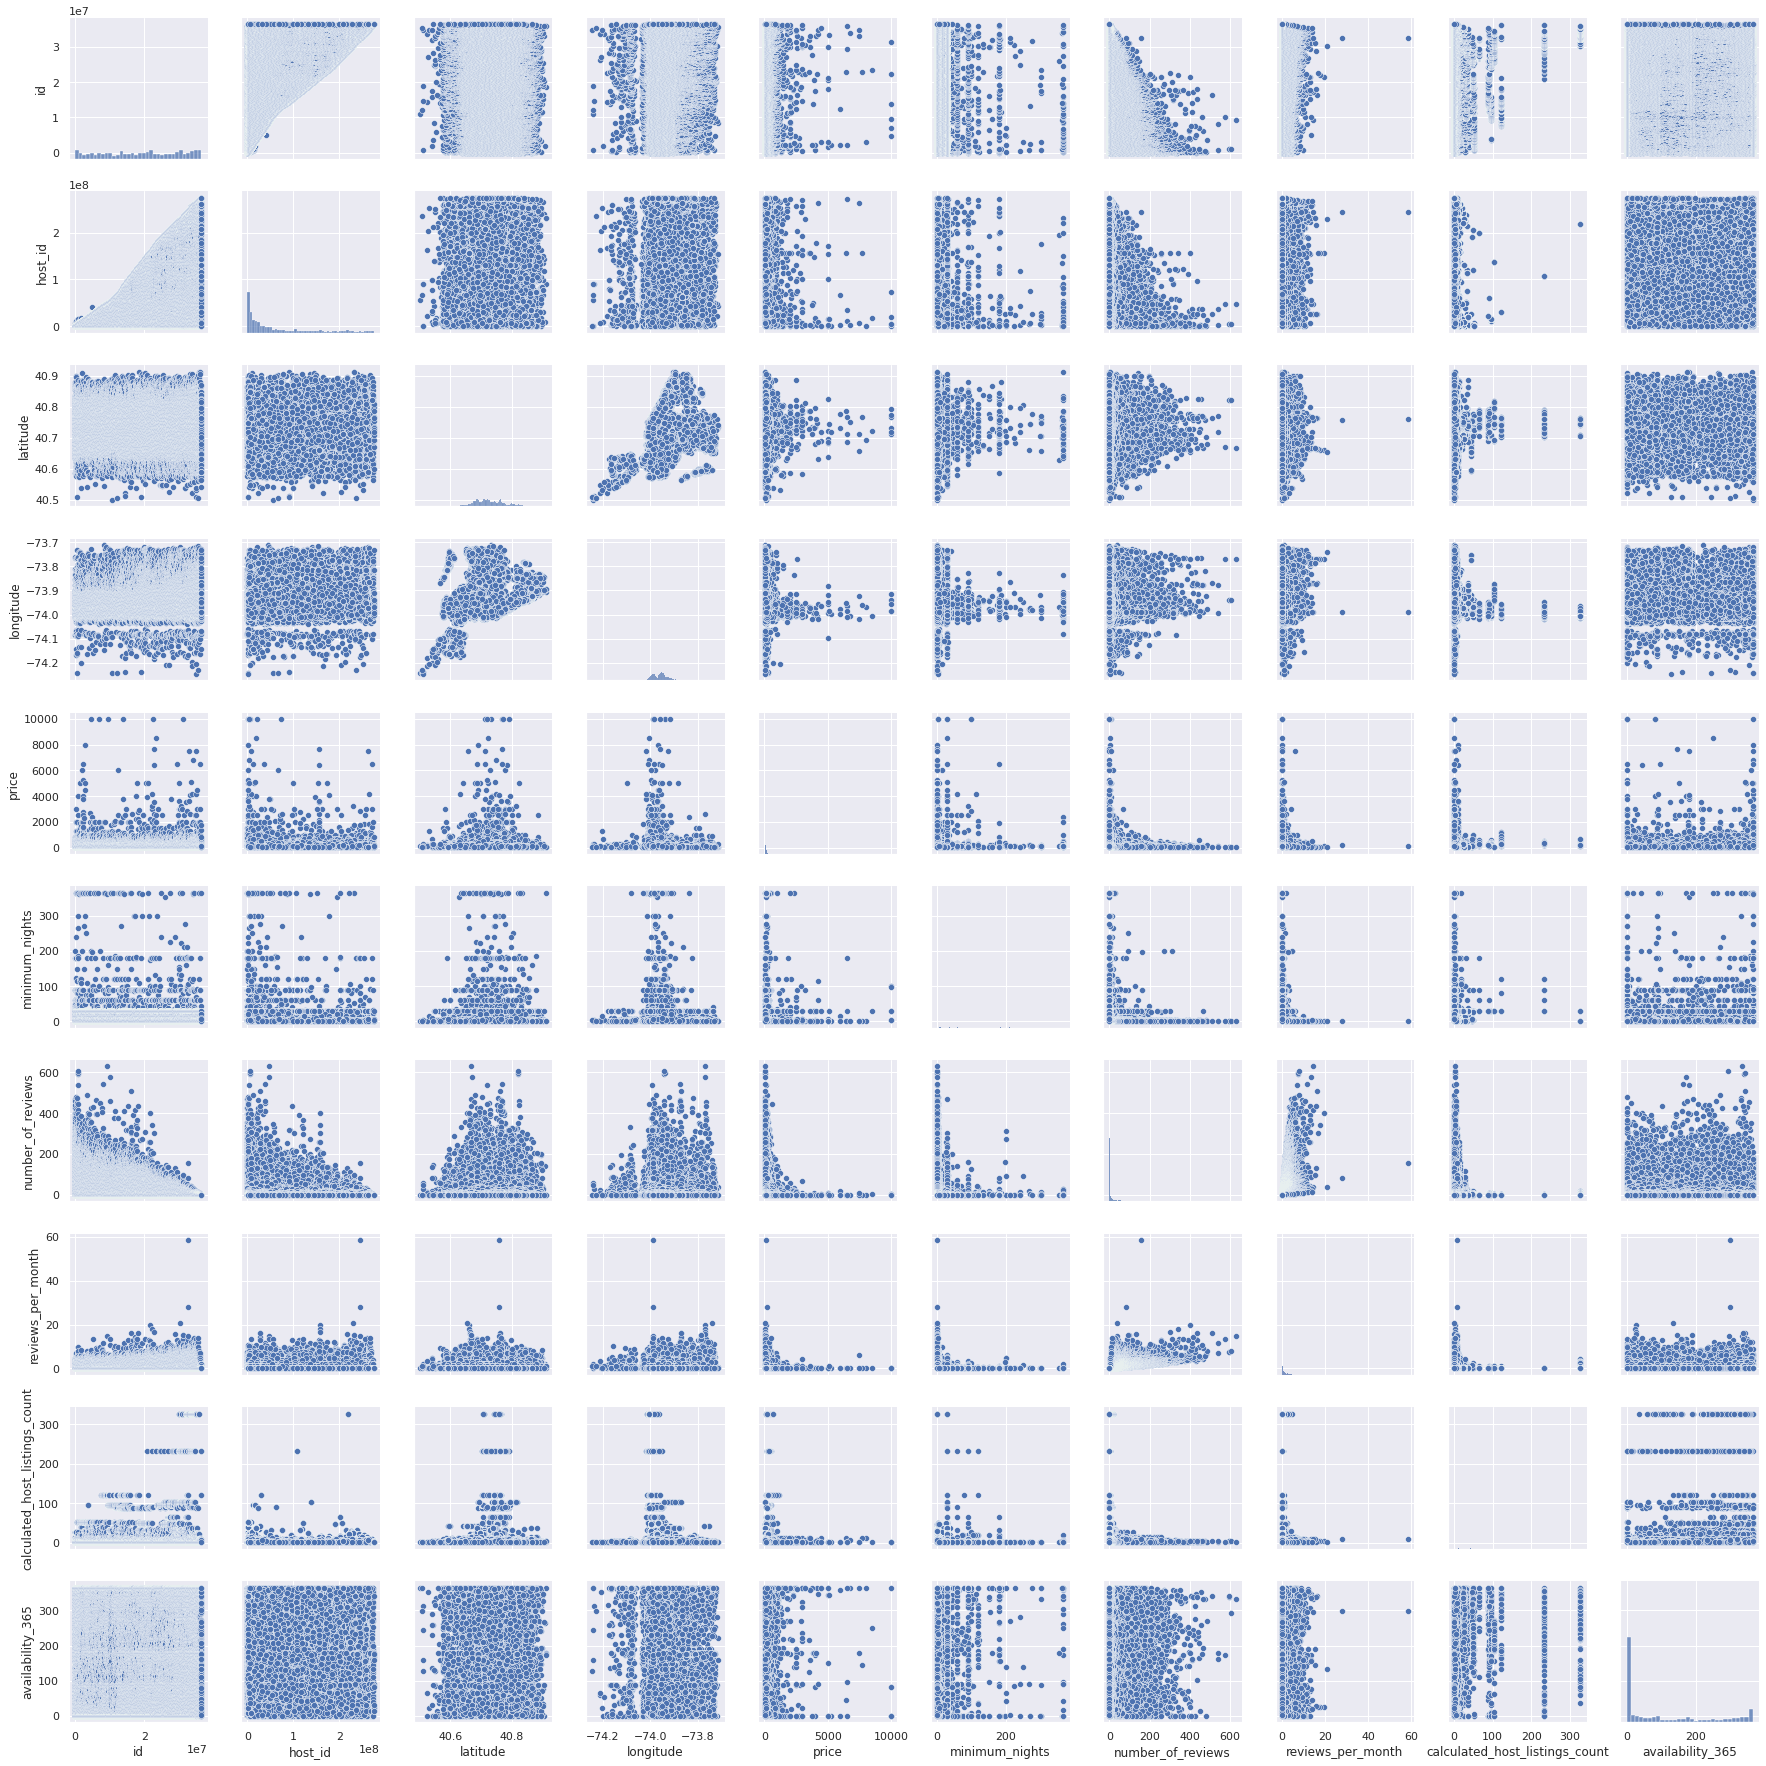

In [59]:
# Pair Plot visualization code
# Plotting the Pairplot using Seaborn

sns.pairplot(df)

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Airbnb is already a successful tech company. Now, if it wants to do break into the hotel industry starting in New York City, Here are the data driven suggestions: <br>

1. It is safer to stick with either of the top 2 neighbourhood group: **Brooklyn / Manhattan**.

2. As all the tourist attractions in NYC are present mostly in Manhattan & Brooklyn, guests prefer to stay close to this proximity, which in-turn allows hosts to charge higher prices. <br>
Hence Airbnb should look at investing in any of these 2 neighbourhood groups.

3. It would be the best for Airbnb to locate their hotel in any one of the top 10 neighbourhoods within Brooklyn & Manhattan.

4. If Airbnb is thinking of starting off with a small investment, the provided 10 neighbourhoods would be best suited as they have low land price, and therefore will be able to charge customers in range of USD 50-60

5. If Airbnb has narrowed their choices to Brooklyn & Manhattan, it is best to invest in an entire home if they're going with Manhattan / invest in a single room if they're going with Brooklyn.

6. The top 10 people know the game better than anybody else, therefore Airbnb can get any one of them as a consultant at least for their first investment.

7. If Airbnb is targeting the luxury segment, they have to make sure to be available 365 days a year. These properties are empty most of the year & make their money back in short amount of time due to high pricing.

8. If Airbnb is planning in the luxury niche, they have to be on point as there's not much reviews and they've got to make sure every review they get is positive.

Airbnb is going to have an edge while trying breaking into hotel industry.
That is **'TRUST'**. Trust of millions of customers & hosts on the platform who've had the best experience with airbnb. <br>
Now with **Airbnb Stay**, the customers' expectations are going to be much higher. They would want to experience the elegance of Airbnb's platform on a physical level.




# **Conclusion**

After analysing almost 49,000 properties on airbnb, it seems the platform has given an additional source of income to the owners and a choice of home vibe bed & breakfast to the guests over the traditional hotels.

As the dataset had 16 variables to measure from, it gave detailed idea of different characteristics of the property, filtered over time by the choice of the market.

By analysing these units, the solutions for preferrd business objective was offered.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***